In [120]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%pylab
%matplotlib inline

import scipy.linalg
import sklearn.decomposition as dec
import sklearn.datasets as ds
import seaborn as sns

sns.set_context("talk")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [121]:
#reading the csv
dataset = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir_20221104.csv")

<ipython-input-121-4a624fea57fe>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("2022_LoL_esports_match_data_from_OraclesElixir_20221104.csv")


In [122]:
#masking the dataset to show only complete data as well as only team data
newdataset = dataset[dataset["datacompleteness"] == "complete"]
teamdataset = newdataset[newdataset["position"] == 'team']

#dropping unnecessary classification columns like gameid and url
cleaneddataset = teamdataset.drop(['gameid',"url", 'split', 'patch','playoffs', 'game','playerid', 'teamid', 'ban1','ban2','ban3','ban4','ban5','date','playername'], axis = 1)


In [140]:
#generating a correlation matrix of the cleaned dataset
cor = cleaneddataset.corr() 

#grabbing the result correlation column from the matrix
results = cor.result.to_dict() 

#removing the NaN values from the result correlation column
clean_results = {k: results[k] for k in results if not isnan(results[k])} 

#turning the cleaned results into a sorted dictionary (sorted by values)
sorteddict = sorted(clean_results.items(), key=lambda x:x[1])

#turning the sorted results into a list
sorted_results = list(sorteddict)

<ipython-input-140-db298f6dce19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = cleaneddataset.corr()


In [124]:
#looking at the top 20 highest correlated features that impact the result of the match
sorted_results[-21:] 

[('firstmidtower', 0.45369114725604737),
 ('monsterkillsenemyjungle', 0.4808789155780898),
 ('xpdiffat15', 0.4925078606183914),
 ('golddiffat15', 0.5380993707971289),
 ('firsttothreetowers', 0.5560290182085744),
 ('dragons (type unknown)', 0.5744357905863939),
 ('elementaldrakes', 0.5752041893278148),
 ('dragons', 0.5773125151934989),
 ('earnedgold', 0.5786433389493582),
 ('doublekills', 0.5904066574076894),
 ('barons', 0.6247671822214014),
 ('firstbaron', 0.6642252960875722),
 ('team kpm', 0.6722428748237427),
 ('kills', 0.6753764793854251),
 ('teamkills', 0.6753764793854251),
 ('assists', 0.6776797718312247),
 ('inhibitors', 0.7453084575918484),
 ('gspd', 0.7469497858623866),
 ('earned gpm', 0.8247888228590404),
 ('towers', 0.882544141539808),
 ('result', 1.0)]

In [129]:
#Dropping the columns outside of the 20 highest correlated features 
#Also dropped high correlation columns that had NaN values 
#product is the final dataset
final_dataset = cleaneddataset.drop(['firstbloodkill','firstbloodassist','firstbloodvictim','monsterkillsenemyjungle','damageshare','earnedgoldshare','champion','opp_towers', 'opp_inhibitors', 'deaths', 'teamdeaths', 'opp_barons', 'opp_dragons', 'opp_elementaldrakes', 'opp_goldat15', 'opp_xpat15', 'opp_goldat10', 'opp_turretplates', 'opp_killsat15', 'deathsat15', 'opp_heralds', 'opp_assistsat15', 'opp_xpat10', 'damagetakenperminute', 'opp_csat15', 'opp_killsat10', 'deathsat10', 'opp_assistsat10', 'opp_csat10', 'opp_elders', 'monsterkillsownjungle', 'participantid', 'year', 'ckpm', 'gamelength', 'controlwardsbought', 'chemtechs', 'damagemitigatedperminute', 'wardsplaced', 'minionkills', 'pentakills', 'wpm', 'wardskilled', 'elders', 'firstdragon', 'firstherald', 'csat10', 'quadrakills', 'wcpm', 'assistsat10', 'visionscore', 'clouds', 'mountains', 'oceans', 'opp_deathsat10', 'killsat10', 'firstblood', 'infernals', 'hextechs', 'csat15', 'xpat10', 'goldspent', 'assistsat15', 'heralds', 'opp_deathsat15', 'killsat15', 'damagetochampions', 'turretplates', 'csdiffat10', 'cspm', 'goldat10', 'monsterkills', 'xpat15', 'firsttower', 'vspm', 'triplekills', 'xpdiffat10', 'csdiffat15', 'dpm', 'totalgold', 'goldat15','total cs', 'datacompleteness'],axis = 1)

<ipython-input-139-813f8f0d2072>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = final_dataset.corr()


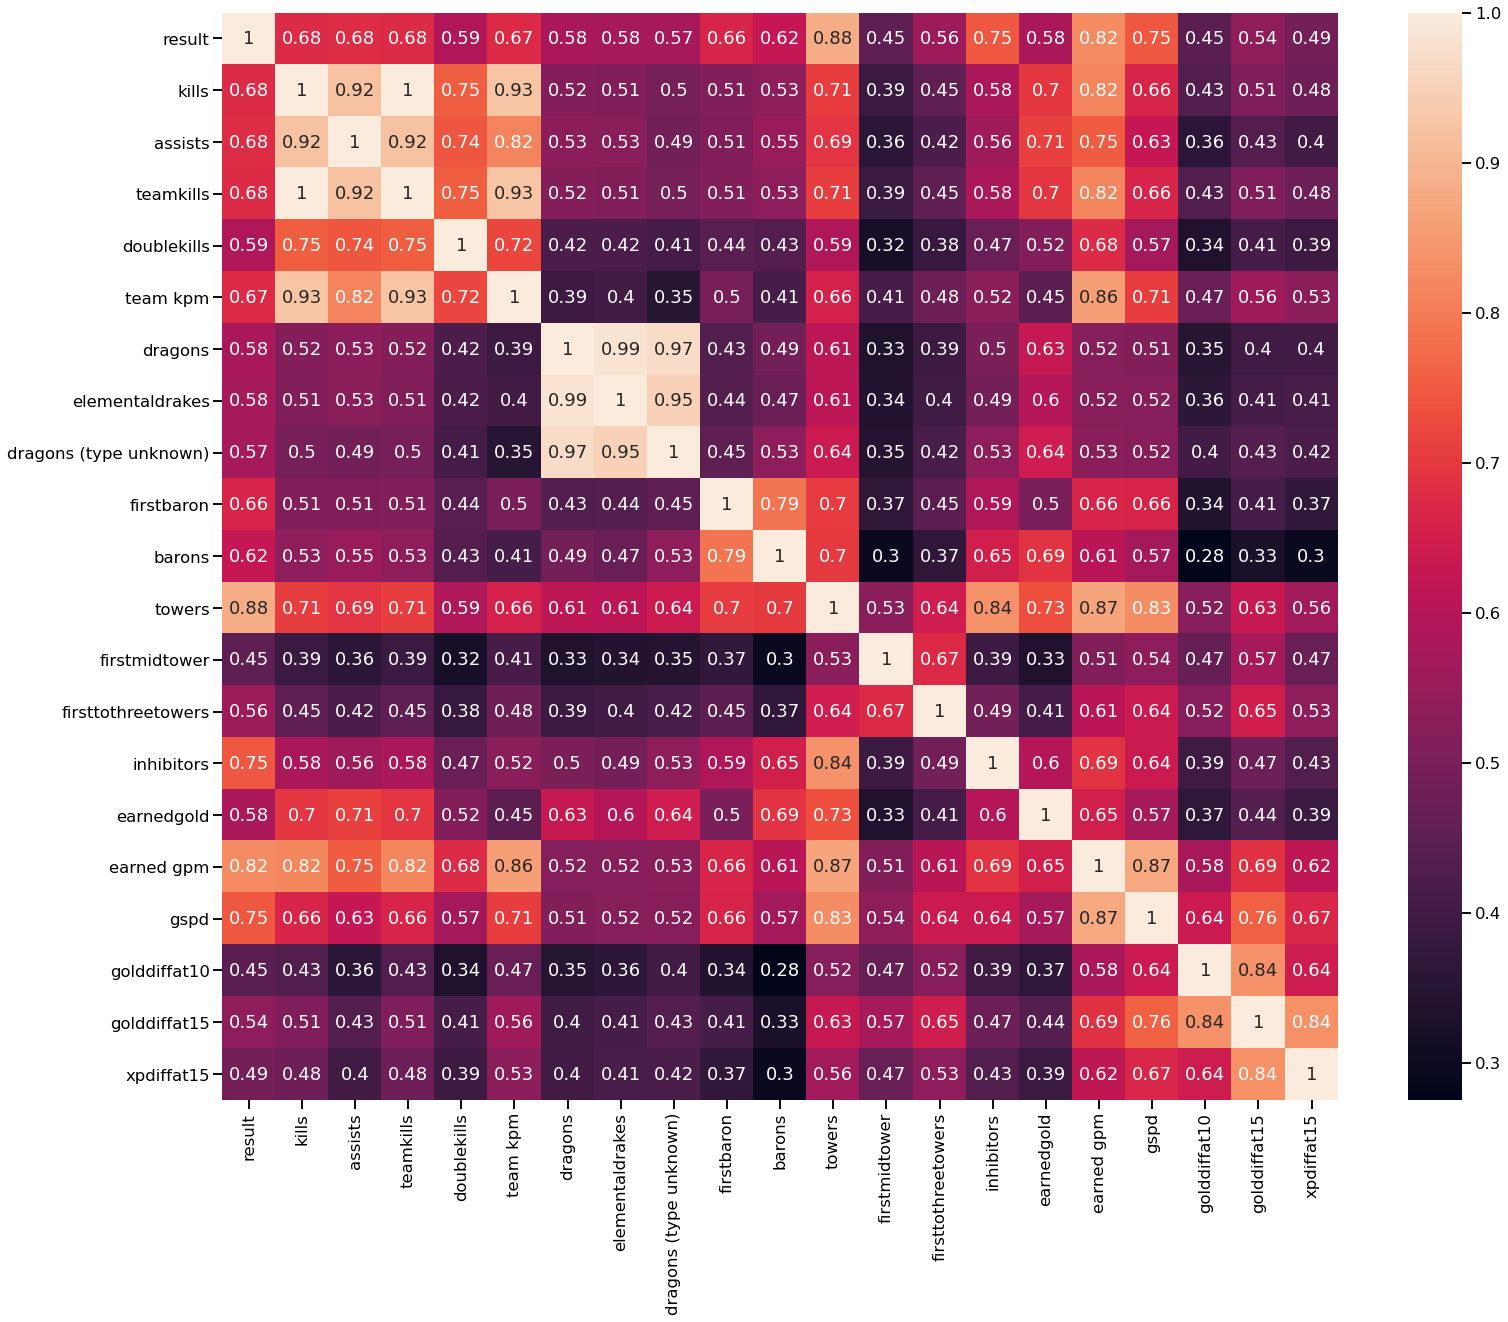

In [139]:
plt.figure(figsize = (25,20))
corr_matrix = final_dataset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()